# Task
Apply K-Means and Hierarchical Clustering on sample datasets



## Upload file

### Subtask:
Create a cell for uploading the csv files.


**Reasoning**:
Create a code cell to handle the file upload process using google.colab.files.upload and print a message to the user.



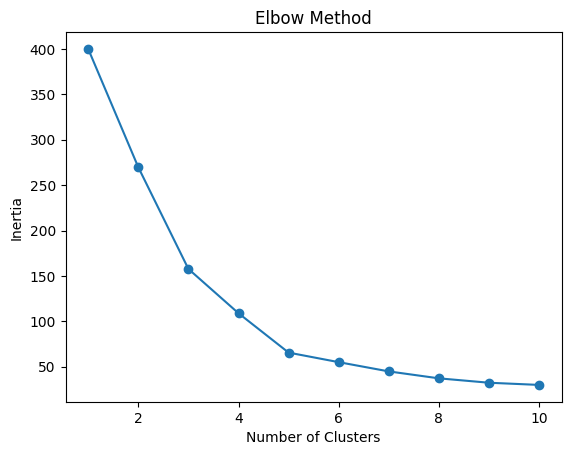

Silhouette Score: 0.5546571631111091


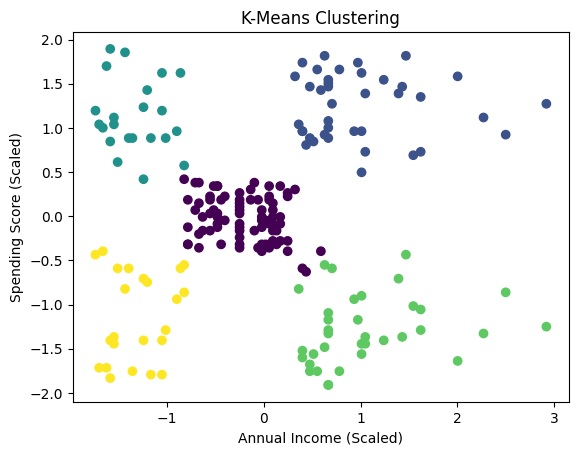

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ----------------------------
# 1️⃣ Load Dataset
# ----------------------------
df = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ----------------------------
# 2️⃣ Feature Scaling
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 3️⃣ Elbow Method
# ----------------------------
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# ----------------------------
# 4️⃣ Train Final Model (Assume K=5)
# ----------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataset
df['Cluster'] = clusters

# ----------------------------
# 5️⃣ Silhouette Score
# ----------------------------
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

# ----------------------------
# 6️⃣ Cluster Visualization
# ----------------------------
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title("K-Means Clustering")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.show()